Here is review some issues that we got after made the previous 5_fixingIssues.ipynb and create the new methos in peaksValleys class

In [1]:
import sys
sys.path.append('/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/')
from kabu import curves
from kabuWaves import waves
from kabuPeaksValleys import peaksValleys
# como asi no se importa la librearia estos alias deben ser cambiados en las funciones
# de abajo!!!!!!!!!!!!!!!!!!!!!!!!
# importing other necesary libraries
import pandas as pd

In [2]:
# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]]
databaseBrazil = database[database["Country_code"]=="BR"].reset_index(drop=True)
datesName = "Date_reported"
casesName = "New_cases"


# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/configurationFile.csv")
configFile.head(3)

# the names of the output files
plotNameW = "0Epidemic_curve_Brazil_W"
dfNameW = "0Epidemic_curve_Brazil_W"
plotNamePV = "0Epidemic_curve_Brazil_PV"
dfNamePV = "0Epidemic_curve_Brazil_PV"

#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/dataframes/"

# The threshols is optional by default is zero. We declarate them but ...
thresholdW = 0
thresholdPV = 0

In [4]:
databaseBrazil.head(3)

,Date_reported,Country_code,Country,New_cases
0,2020-01-03,BR,Brazil,0
1,2020-01-04,BR,Brazil,0
2,2020-01-05,BR,Brazil,0


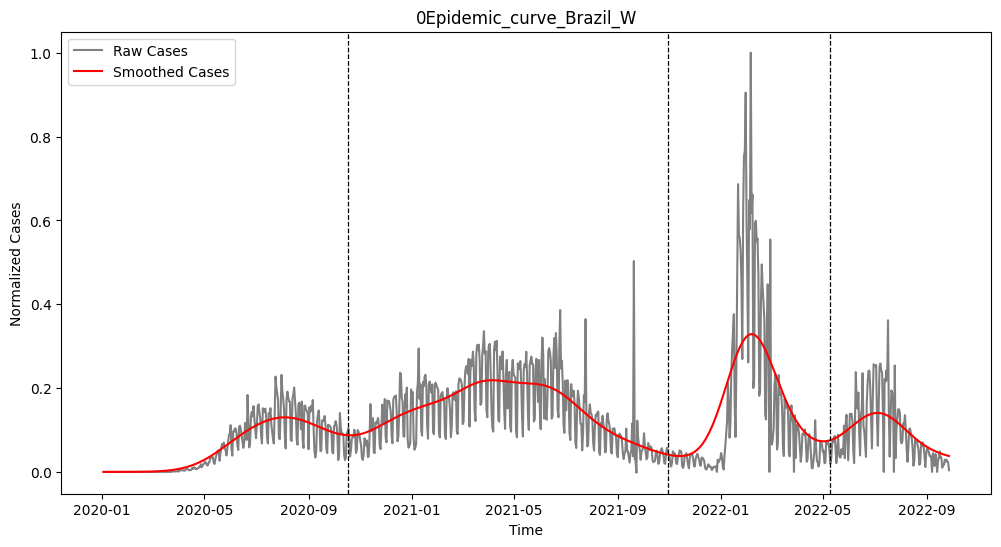

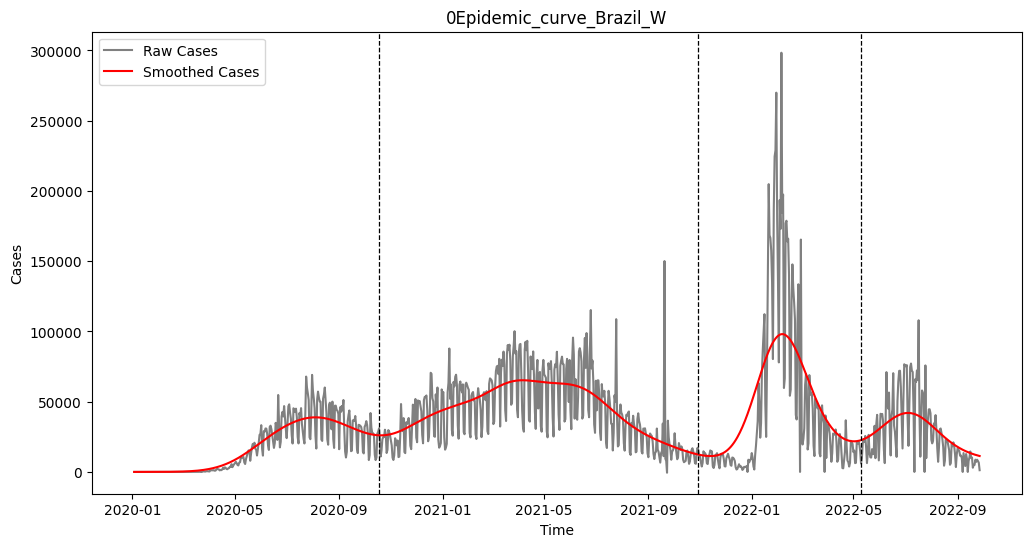

In [3]:
#this is an example of how you get the waves
example = waves(databaseBrazil,datesName,casesName,[configFile,"Code","BR","kernel1"],[configFile,"Code","BR","Kernel2"],plotNameW,dfNameW,outFolderPlot,outFolderDF)
example.run()

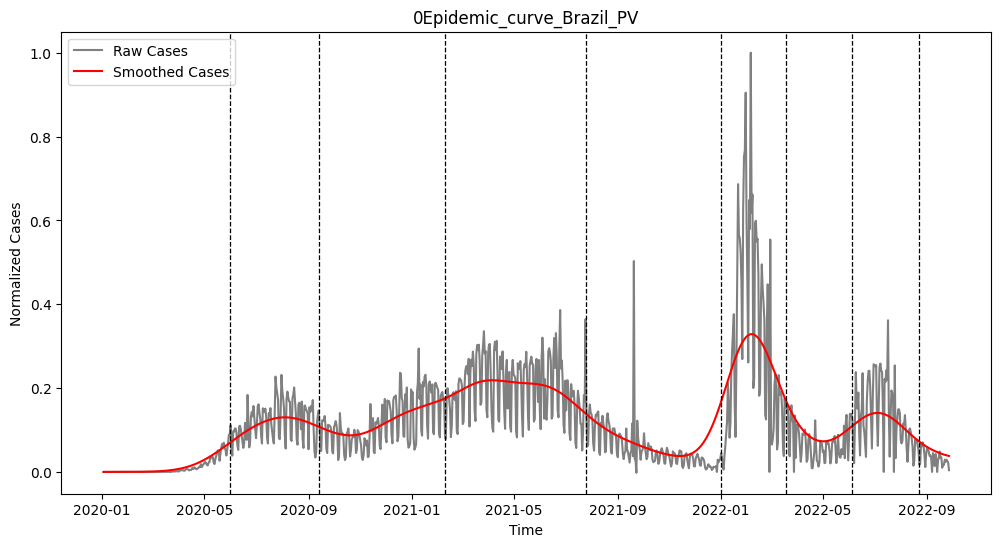

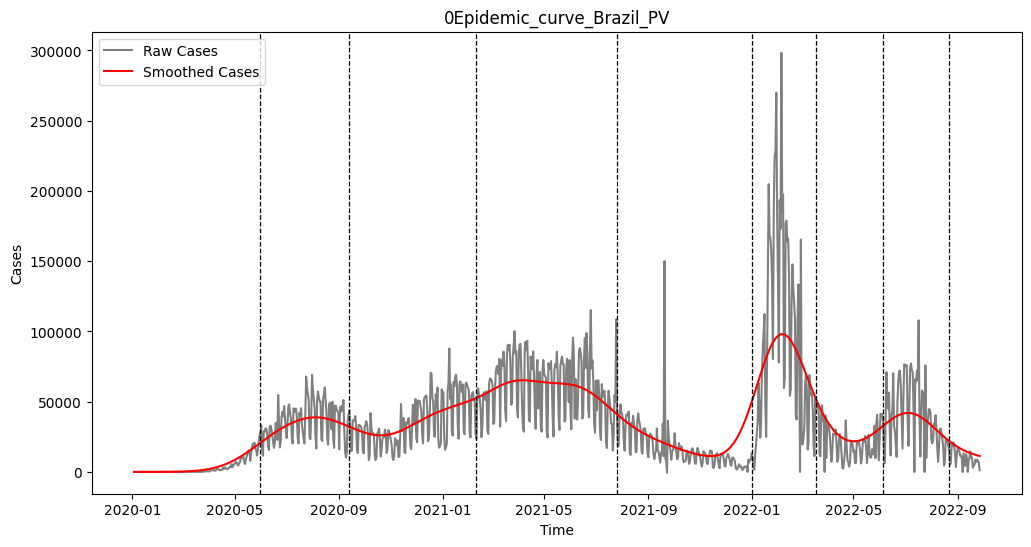

In [3]:
#this is an example of how you get the waves
example = peaksValleys(databaseBrazil,datesName,casesName,[configFile,"Code","BR","kernel1"],[configFile,"Code","BR","Kernel2"],plotNamePV,dfNamePV,outFolderPlot,outFolderDF)
example.run()

We have to review why there are just one cutDatesPV in the second wave 

In [9]:
df = example.df
df.head(4)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW,rollingSD,cutDatesPV0,cutDatesW2,peaksDates,cutDatesPV
0,2020-01-03,BR,Brazil,0,0.0,0.0,0.000004,1.146454,NaN,0.000009,NaN,False,0,False,0,0,0,0
1,2020-01-04,BR,Brazil,0,0.0,0.0,0.000004,1.278140,4.412961e-07,0.000009,4.035124e-07,0.0,0,False,0,0,0,0
2,2020-01-05,BR,Brazil,0,0.0,0.0,0.000005,1.424564,4.906833e-07,0.000010,4.261471e-07,0.0,0,0.0,0,0,0,0
3,2020-01-06,BR,Brazil,0,0.0,0.0,0.000005,1.587312,5.453891e-07,0.000010,4.500992e-07,0.0,0,0.0,0,0,0,0


In [21]:
peaksAndCutPV=df.groupby(df["cutDatesW2"]).apply(
    lambda x :
    x[[datesName,"cutDatesW2","peaksDates","cutDatesPV","cutDatesPV0"]]
)
peaksAndCutPV

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_3832/2392059171.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  peaksAndCutPV=df.groupby(df["cutDatesW2"]).apply(


,Date_reported,cutDatesW2,peaksDates,cutDatesPV,cutDatesPV0
0,2020-01-03,0,0,0,0
1,2020-01-04,0,0,0,0
2,2020-01-05,0,0,0,0
3,2020-01-06,0,0,0,0
4,2020-01-07,0,0,0,0
...,...,...,...,...,...
994,2022-09-23,3,0,0,0
995,2022-09-24,3,0,0,0
996,2022-09-25,3,0,0,0
997,2022-09-26,3,0,0,0


In [23]:
df2=peaksAndCutPV[peaksAndCutPV["cutDatesW2"]==1]
df2

,Date_reported,cutDatesW2,peaksDates,cutDatesPV,cutDatesPV0
289,2020-10-18,1,0,0,0
290,2020-10-19,1,0,0,0
291,2020-10-20,1,0,0,0
292,2020-10-21,1,0,0,0
293,2020-10-22,1,0,0,0
...,...,...,...,...,...
661,2021-10-25,1,0,0,0
662,2021-10-26,1,0,0,0
663,2021-10-27,1,0,0,0
664,2021-10-28,1,0,0,0


In [24]:
df2[df2["cutDatesPV0"]==1]

,Date_reported,cutDatesW2,peaksDates,cutDatesPV,cutDatesPV0
348,2020-12-16,1,0,0,1
383,2021-01-20,1,0,0,1
403,2021-02-09,1,0,0,1
570,2021-07-26,1,0,1,1


In [16]:
df2[df2["cutDatesPV"]==1]

,Date_reported,cutDatesW2,peaksDates,cutDatesPV
570,2021-07-26,1,0,1


In [17]:
df2[df2["peaksDates"]==1]

,Date_reported,cutDatesW2,peaksDates,cutDatesPV
626,2021-09-20,1,1,0


In [15]:
#step3: crating the peaksDates column in the df
df["peaksDates"] = df[datesName].isin(peaksDates).astype(int)
df.head(2)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingSD,cutDatesPV,rollingFDS,cutDatesW,cutDatesW2,peaksDates
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0,False,0,0,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,False,0,0.0,0,0,0


In [42]:
df[df["peaksDates"]==1][datesName]

99    2020-04-11
299   2020-10-28
445   2021-03-23
690   2021-11-23
753   2022-01-25
809   2022-03-22
921   2022-07-12
991   2022-09-20
Name: Date_reported, dtype: datetime64[ns]

In [28]:
#step 4:selecting the positions/dates in cutDatesPV that are closest 
#to the peaksDates

In [26]:
def subtraction(serie,timestamp):
    
    subtraction = serie-timestamp
    subtraction2 = [td.days for td in subtraction]
    
    zipping = list(zip(serie,subtraction2))
    
    pos = [i for i in zipping if i[1]>0]
    neg = [i for i in zipping if i[1]<0]
    
    if len(pos)==0:
        minPos = [[],[]]
    
    elif len(pos)==1: 
        minPos = pos[0]
    else:
        minPos=3
        minPos = min(pos, key = lambda x: x[1])
        
    if len(neg)== []:
        maxNeg = [[],[]]
    else:
        maxNeg = 3
        maxNeg = max(neg, key = lambda x: x[1])
    
    return [minPos[0],maxNeg[0]]


In [29]:
filteredPVCutDates = df.groupby(df["cutDatesW2"]).apply(
    lambda x:
    subtraction(
        x[x["cutDatesPV"]==1]["Date_reported"],
        x[x["peaksDates"]==1]["Date_reported"].iloc[0])
)

In [39]:
listCutDatesPVfilt=[item for sublist in filteredPVCutDates for item in sublist if item]
listCutDatesPVfilt

[Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-03-20 00:00:00'),
 Timestamp('2020-11-11 00:00:00'),
 Timestamp('2020-10-08 00:00:00'),
 Timestamp('2021-05-29 00:00:00'),
 Timestamp('2021-03-11 00:00:00'),
 Timestamp('2021-12-08 00:00:00'),
 Timestamp('2021-11-07 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-01-08 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-03-17 00:00:00'),
 Timestamp('2022-07-28 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-09-15 00:00:00')]

In [40]:
#step4: creating the peaksDates column in the df
df["cutDayPVFiltered"] = df[datesName].isin(listCutDatesPVfilt).astype(int)
df.head(2)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingSD,cutDatesPV,rollingFDS,cutDatesW,cutDatesW2,peaksDates,cutDayPVFiltered
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0,False,0,0,0,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,False,0,0.0,0,0,0,0


In [41]:
df[df["cutDayPVFiltered"]==1][datesName].info()

<class 'pandas.core.series.Series'>
Int64Index: 15 entries, 77 to 986
Series name: Date_reported
Non-Null Count  Dtype         
--------------  -----         
15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 240.0 bytes


Jus trying to plot the "listCutDatesPVfilt"

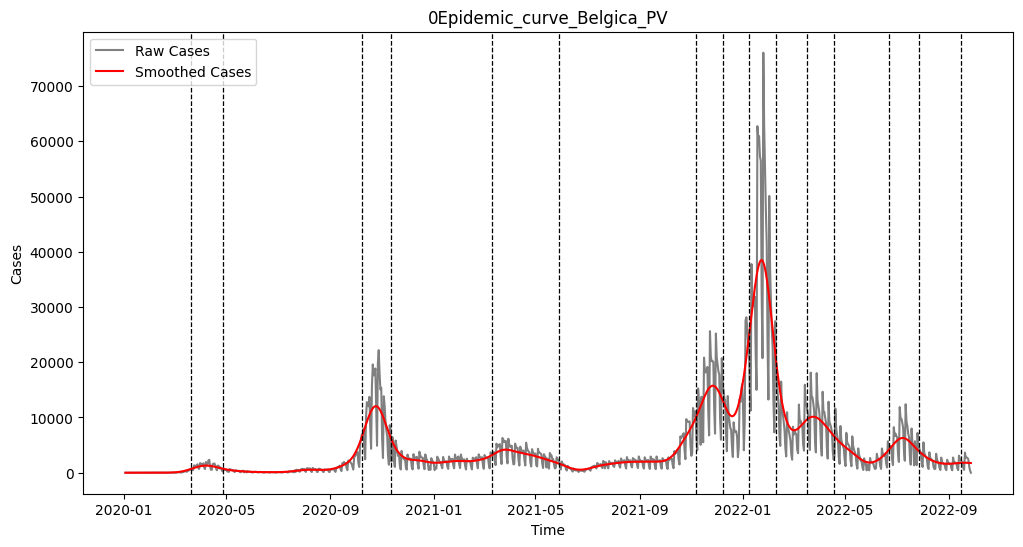

In [49]:
pv.plottingTheCurveNoNormalized(listCutDatesPVfilt)

After incorporate the new method in the Library

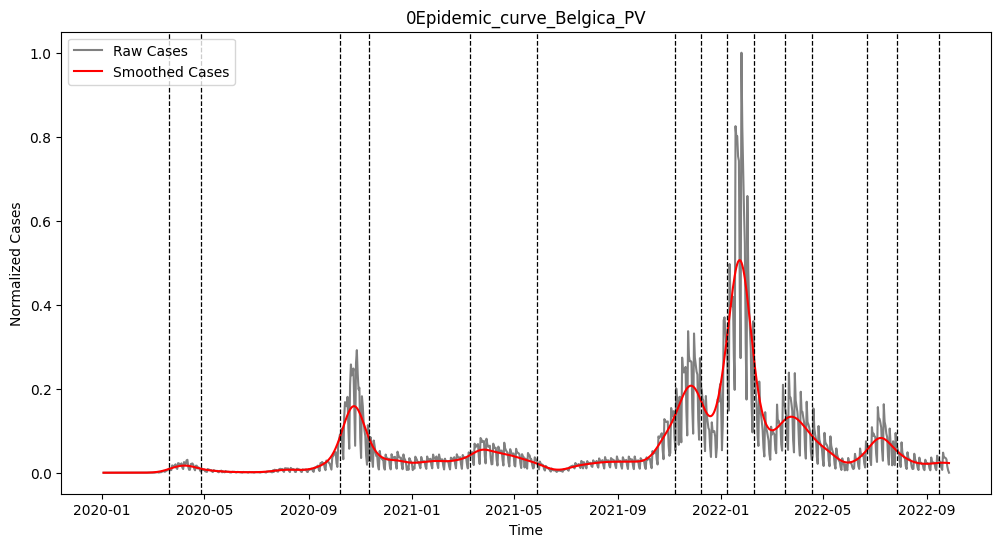

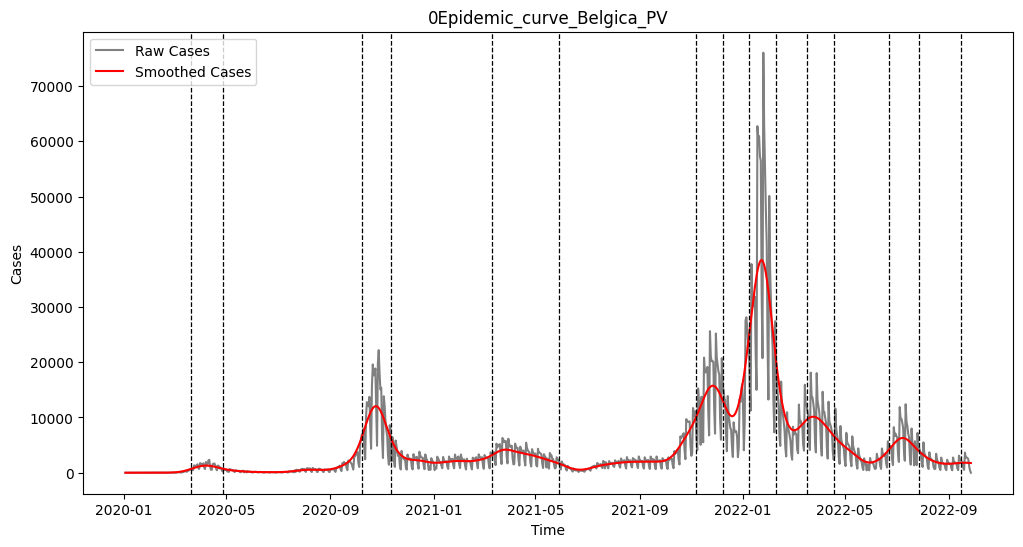

In [11]:
#Instance
pv = peaksValleys(databaseBelgica,datesName,casesName,[configFile,"Code","BE","kernel1"],[configFile,"Code","BE","Kernel2"],plotNamePV,dfNamePV,outFolderPlot,outFolderDF)
pv.run()